In [1]:
# Gerekli Kütüphaneleri Yükleyin
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r"C:\Users\hsynt\Desktop\JAVAMAKALE\VeriSetimiz\VeriSeti2.csv")

Eğitim: Epochs=5, Batch Size=16, Learning Rate=0.001
Eğitim: Epochs=5, Batch Size=16, Learning Rate=0.0005
Eğitim: Epochs=5, Batch Size=16, Learning Rate=0.0001
Eğitim: Epochs=5, Batch Size=32, Learning Rate=0.001
Eğitim: Epochs=5, Batch Size=32, Learning Rate=0.0005
Eğitim: Epochs=5, Batch Size=32, Learning Rate=0.0001
Eğitim: Epochs=5, Batch Size=64, Learning Rate=0.001
Eğitim: Epochs=5, Batch Size=64, Learning Rate=0.0005
Eğitim: Epochs=5, Batch Size=64, Learning Rate=0.0001
Eğitim: Epochs=10, Batch Size=16, Learning Rate=0.001
Eğitim: Epochs=10, Batch Size=16, Learning Rate=0.0005
Eğitim: Epochs=10, Batch Size=16, Learning Rate=0.0001
Eğitim: Epochs=10, Batch Size=32, Learning Rate=0.001
Eğitim: Epochs=10, Batch Size=32, Learning Rate=0.0005
Eğitim: Epochs=10, Batch Size=32, Learning Rate=0.0001
Eğitim: Epochs=10, Batch Size=64, Learning Rate=0.001
Eğitim: Epochs=10, Batch Size=64, Learning Rate=0.0005
Eğitim: Epochs=10, Batch Size=64, Learning Rate=0.0001
Eğitim: Epochs=15, Batch 

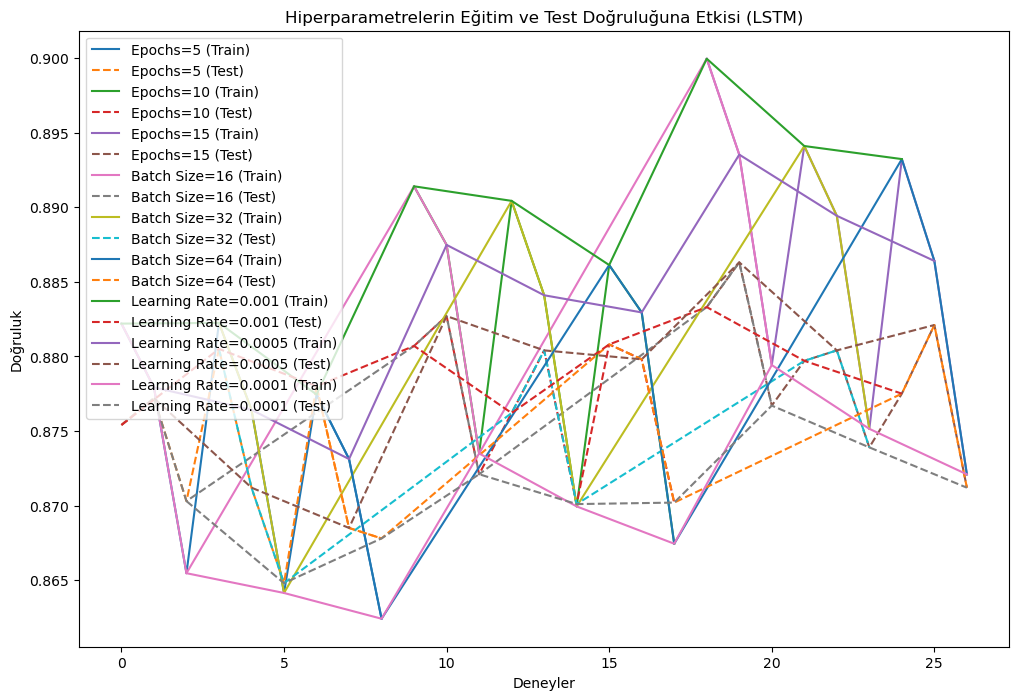

In [3]:
# Özellik ve Hedef Ayrımı
X = data.drop(columns=['Target_10', 'adjclose'])
y = data['Target_10']

# Zaman Serisi Formatına Getirme (LSTM için 3D input)
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Sekans boyutu (LSTM için)
SEQ_LENGTH = 10

# Özellikleri Ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sekans Verisi Oluşturma
X_seq = create_sequences(X_scaled, SEQ_LENGTH)
y_seq = y[SEQ_LENGTH:].values

# Eğitim ve Test Setlerine Bölme
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)

# LSTM Modelini Tanımlama
def build_lstm_model(input_shape, learning_rate):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, activation='relu', return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hiperparametre Kombinasyonları
epochs_list = [5, 10, 15]
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.0005, 0.0001]

# Sonuçları Saklama
results = []

# Hiperparametreler Üzerinde Döngü
for epochs in epochs_list:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            print(f"Eğitim: Epochs={epochs}, Batch Size={batch_size}, Learning Rate={learning_rate}")
            
            # Modeli Oluştur
            model = build_lstm_model(X_train.shape[1:], learning_rate)
            
            # Modeli Eğit
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # Test Seti Doğruluğunu Hesapla
            test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
            
            # Sonuçları Kaydet
            results.append({
                "Epochs": epochs,
                "Batch Size": batch_size,
                "Learning Rate": learning_rate,
                "Train Accuracy": history.history['accuracy'][-1],
                "Test Accuracy": test_accuracy
            })

# Sonuçları DataFrame'e Çevir
results_df = pd.DataFrame(results)

# Sonuçları Görselleştirme
plt.figure(figsize=(12, 8))
for param in ["Epochs", "Batch Size", "Learning Rate"]:
    for value in results_df[param].unique():
        subset = results_df[results_df[param] == value]
        plt.plot(subset["Train Accuracy"], label=f"{param}={value} (Train)")
        plt.plot(subset["Test Accuracy"], label=f"{param}={value} (Test)", linestyle='dashed')

plt.title("Hiperparametrelerin Eğitim ve Test Doğruluğuna Etkisi (LSTM)")
plt.xlabel("Deneyler")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()